In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

G.	Create a random noise image with equal size of original image. Random with normal distribution (zero mean, unit variance). Show the noise image. 

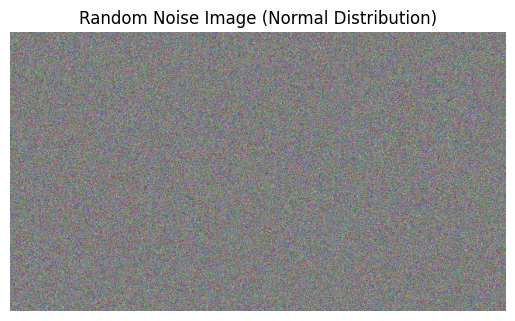

In [7]:
image = cv2.imread('D:\\PIK\\y2-1\\robomaster\\robomaster_sharp\\Robomaster_Challenge\\lab4\\image.png')
height, width, channels = image.shape

noise = np.random.normal(0, 1, (height, width, channels))

noise_normalized = cv2.normalize(noise, None, 0, 255, cv2.NORM_MINMAX)
noise_normalized = noise_normalized.astype(np.uint8)

plt.imshow(noise_normalized, cmap='gray')
plt.title('Random Noise Image (Normal Distribution)')
plt.axis('off')
plt.show()

H.	Combine the noise image with rescaled L-channel image. Show the results image. 

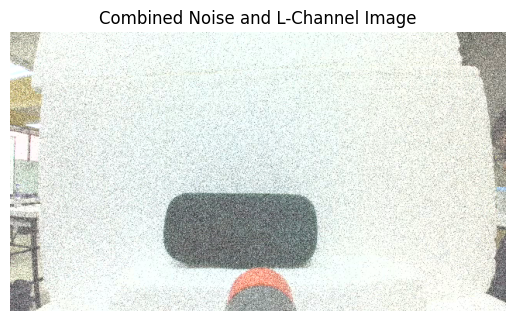

In [8]:
# โหลดภาพตัวอย่างในโหมดสี (เปลี่ยนเส้นทางของภาพตามที่ต้องการ)
image = cv2.imread('D:\\PIK\\y2-1\\robomaster\\robomaster_sharp\\Robomaster_Challenge\\lab4\\image.png')

# แปลงภาพเป็นโหมดสี LAB
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# แยกภาพ LAB ออกเป็นช่อง L, A, และ B
L, A, B = cv2.split(lab_image)

# Rescale ช่อง L ให้มีช่วงที่ตรงกับสัญญาณรบกวน (0-255)
L_rescaled = cv2.normalize(L, None, 0, 255, cv2.NORM_MINMAX)

# สร้างสัญญาณรบกวนแบบสุ่มด้วยการแจกแจงแบบปกติ (mean=0, variance=1)
height, width = L_rescaled.shape
noise = np.random.normal(0, 1, (height, width))

# Normalize สัญญาณรบกวนให้อยู่ในช่วงเดียวกับช่อง L (0-255)
noise_normalized = cv2.normalize(noise, None, 0, 255, cv2.NORM_MINMAX)
noise_normalized = noise_normalized.astype(np.uint8)

# รวมภาพสัญญาณรบกวนเข้ากับช่อง L ที่ถูกปรับขนาดแล้ว
combined_L = cv2.add(L_rescaled, noise_normalized)

# รวมช่อง L ที่ถูกปรับแล้วเข้ากับช่อง A และ B ดั้งเดิม
combined_lab = cv2.merge((combined_L, A, B))

# แปลงภาพ LAB กลับเป็นโหมดสี BGR (RGB)
result_image = cv2.cvtColor(combined_lab, cv2.COLOR_LAB2BGR)

# แสดงผลลัพธ์
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Combined Noise and L-Channel Image')
plt.axis('off')
plt.show()
